In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [28]:
HighestQaulification = pd.read_csv('HighestQualification.csv')

In [33]:
HighestQaulification.head()

,MSOA code,MSOA,Disability,General health,Highest level of qualification,Observation3
0,E02000001,City of London 001,Disabled,Good health,Does not apply,13
1,E02000001,City of London 001,Disabled,Good health,No qualifications,21
2,E02000001,City of London 001,Disabled,Good health,Level 1,6
3,E02000001,City of London 001,Disabled,Good health,Level 2,26
4,E02000001,City of London 001,Disabled,Good health,Level 3,31


In [34]:
HighestQaulification.drop(['MSOA code', 'MSOA'], axis=1, inplace=True)

In [35]:
HighestQaulification['Disability'] = HighestQaulification['Disability'].astype('category')
HighestQaulification['General health'] = HighestQaulification['General health'].astype('category')
HighestQaulification['Highest level of qualification'] = HighestQaulification['Highest level of qualification'].astype('category')

HighestQaulification['Disability'] = HighestQaulification['Disability'].cat.codes
HighestQaulification['General health'] = HighestQaulification['General health'].cat.codes
HighestQaulification['Highest level of qualification'] = HighestQaulification['Highest level of qualification'].cat.codes

HighestQaulification['Disability'] = HighestQaulification['Disability'].astype('int64')
HighestQaulification['General health'] = HighestQaulification['General health'].astype('int64')
HighestQaulification['Highest level of qualification'] = HighestQaulification['Highest level of qualification'].astype('int64')

In [36]:
HighestQaulification.head()

,Disability,General health,Highest level of qualification,Observation3
0,0,0,0,13
1,0,0,5,21
2,0,0,1,6
3,0,0,2,26
4,0,0,3,31


Explained variance ratio [9.99998142e-01 1.09977218e-06]


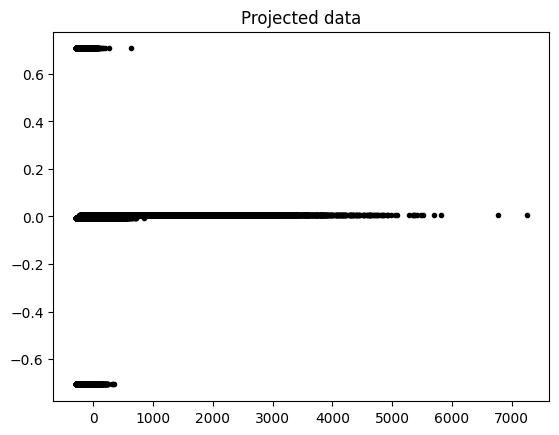

In [42]:
X = HighestQaulification.drop(['Highest level of qualification'], axis=1)
y = HighestQaulification['Highest level of qualification']

pca = PCA(n_components=2)
pca.fit(X)

print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [43]:
tsne = TSNE(n_components = 3, random_state = 1729)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

(203392, 3)

In [44]:
cluster_labels = HighestQaulification['Highest level of qualification']

In [45]:
label_mapping = {0: "Does not apply", 5: "No qualifications", 1: "Level 1", \
                 2: "Level 2", 3: "Level 3", 4: "Level 4",  6: "Other"}

In [39]:
cluster_labels = HighestQaulification['Disability']

In [40]:
label_mapping = {0: 'Disabled', 1: 'Not disabled'}

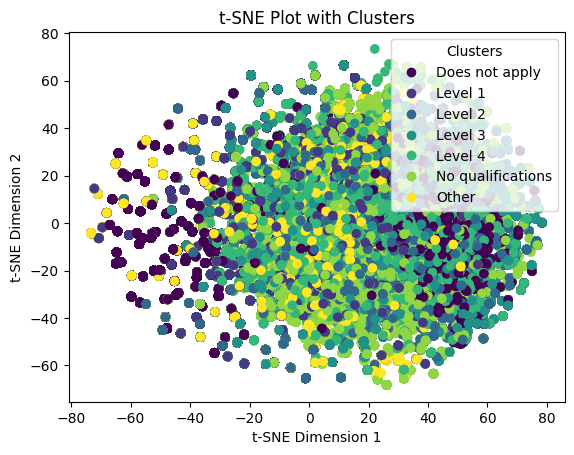

In [46]:
x = tsne_result[:, 0]
y = tsne_result[:, 1]

# Create a scatter plot
scatter = plt.scatter(x, y, c = cluster_labels)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Plot with Clusters")

legend_labels = [label_mapping[label] for label in set(cluster_labels)]  # Rename cluster labels
legend_handles = scatter.legend_elements()[0]  # Get handles for legend markers
plt.legend(legend_handles, legend_labels, title="Clusters")

plt.show()

In [26]:
tsne_df = pd.DataFrame({'tsne1': tsne_result[:,0], 'tsne2': tsne_result[:,1]})

In [31]:
# pd.concat([HighestQaulification, tsne_df], axis=1).to_csv('HighestQualification.csv', index=False)

In [2]:
occ_df = pd.read_csv('Occupation.csv')
occ_df.head()

,MSOA code,MSOA,Occupation,Observation2
0,E02000001,City of London 001,Does not apply,3232
1,E02000001,City of London 001,"Managers, directors and senior officials",1104
2,E02000001,City of London 001,Professional occupations,2349
3,E02000001,City of London 001,Associate professional and technical occupations,1027
4,E02000001,City of London 001,Administrative and secretarial occupations,267


In [24]:
occ_df2 = occ_df.copy()

In [25]:
occ_df2.drop(['MSOA code'], axis=1, inplace=True)

occ_df2['MSOA'] = occ_df2['MSOA'].astype('category')
occ_df2['MSOA'] = occ_df2['MSOA'].cat.codes

occ_df2['Occupation'] = occ_df2['Occupation'].astype('category')
occ_df2['Occupation'] = occ_df2['Occupation'].cat.codes

Explained variance ratio [0.73564527 0.26435473]


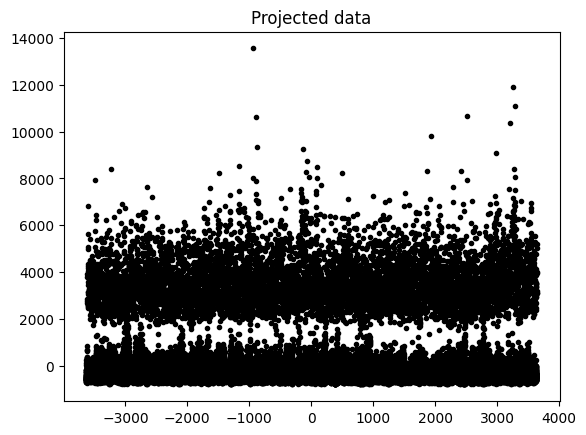

In [26]:
X = occ_df2.drop(['Occupation'], axis=1)
y = occ_df2['Occupation']

pca = PCA(n_components=2)
pca.fit(X)

print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [27]:
pca_df = pd.DataFrame(projX, columns=['PC1', 'PC2'])
pd.concat([occ_df, pca_df], axis=1).to_csv('Occupation.csv', index=False)

In [23]:
Transport_df = pd.read_csv('TransportMode.csv')

In [24]:
Transport_df.head()

,MSOA code,MSOA,Transport Mode,Observation3
0,E02000001,City of London 001,Work mainly at or from home,3602
1,E02000001,City of London 001,"Underground, metro, light rail, tram",349
2,E02000001,City of London 001,Train,95
3,E02000001,City of London 001,"Bus, minibus or coach",132
4,E02000001,City of London 001,Taxi,21


In [25]:
td = Transport_df.copy()

In [26]:
td['MSOA code'] = td['MSOA code'].astype('category')
td['MSOA code'] = td['MSOA code'].cat.codes
td['MSOA code'] = td['MSOA code'].astype('int64')

td['Transport Mode'] = td['Transport Mode'].astype('category')
td['Transport Mode'] = td['Transport Mode'].cat.codes
td['Transport Mode'] = td['Transport Mode'].astype('int64')


Explained variance ratio [0.72279865 0.27720135]


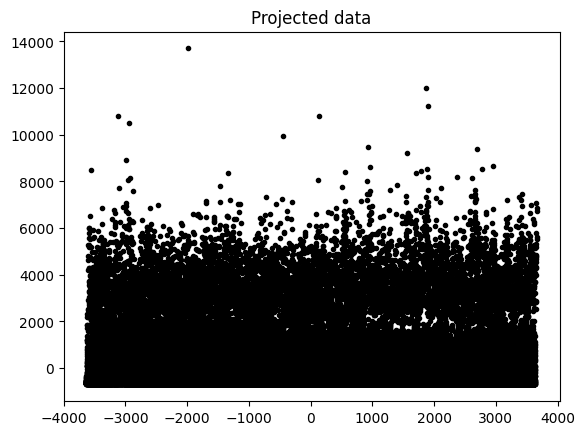

In [27]:
X = td.drop(['Transport Mode', 'MSOA'], axis=1)
y = td['Transport Mode']

pca = PCA(n_components=2)
pca.fit(X)

print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [28]:
pca_df = pd.DataFrame(projX, columns=['PC1', 'PC2'])

In [29]:
pd.concat([Transport_df, pca_df], axis=1).to_csv('TransportMode.csv', index=False)

In [9]:
HLQ_dis = pd.read_csv('HLQ_Dis.csv')
HLQ_dis.head()

,MSOA code,MSOA,Disability,No qualifications,Level 1 and entry level qualifications,Level 2 qualifications,Apprenticeship,Level 3 qualifications,Level 4 qualifications or above,Other qualifications
0,E02002483,Hartlepool 001,Disabled,540,181,215,145,248,316,46
1,E02002484,Hartlepool 002,Disabled,1092,305,300,169,298,339,86
2,E02002485,Hartlepool 003,Disabled,745,224,238,148,225,254,61
3,E02002489,Hartlepool 007,Disabled,673,229,236,113,260,294,40
4,E02002490,Hartlepool 008,Disabled,545,129,161,85,140,204,39


In [10]:
temp = HLQ_dis.copy()

In [11]:
temp.drop(['MSOA code', 'MSOA'], axis=1, inplace=True)

In [12]:
temp['Disability'] = temp['Disability'].astype('category')
temp['Disability'] = temp['Disability'].cat.codes
temp['Disability'] = temp['Disability'].astype('int64')

Explained variance ratio [0.83372954 0.11003739]


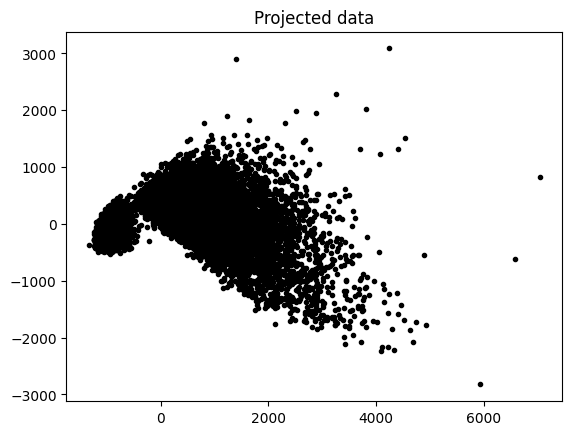

In [13]:
# Now apply PCA
from sklearn.decomposition import PCA

X = temp.drop(['Disability'], axis = 1)
y = temp['Disability']

pca = PCA(n_components = 2)
pca.fit(X)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

In [14]:
tsne = TSNE(n_components = 3, random_state = 1729)
tsne_result = tsne.fit_transform(X)
tsne_result.shape

(14528, 3)

In [15]:
cluster_labels = temp['Disability']
label_mapping = {0: "Disabled", 1: "Not disabled"}

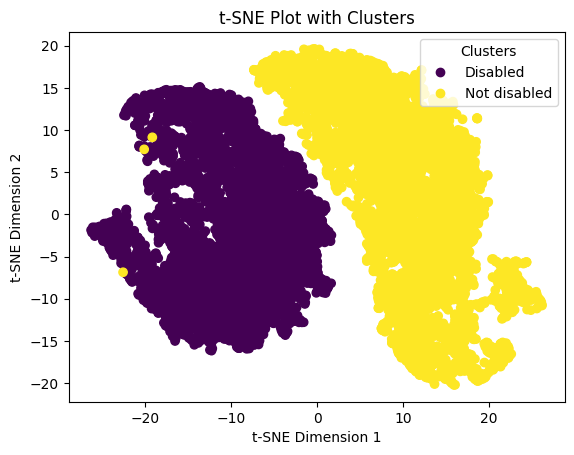

In [16]:
x = tsne_result[:, 0]
y = tsne_result[:, 1]

# Create a scatter plot
scatter = plt.scatter(x, y, c = cluster_labels)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Plot with Clusters")

legend_labels = [label_mapping[label] for label in set(cluster_labels)]  # Rename cluster labels
legend_handles = scatter.legend_elements()[0]  # Get handles for legend markers
plt.legend(legend_handles, legend_labels, title="Clusters")

plt.show()

In [17]:
tsne_df = pd.DataFrame({'tsne1': tsne_result[:,0], 'tsne2': tsne_result[:,1]})

In [18]:
tsne_resultant = pd.concat([HLQ_dis, tsne_df], axis=1).to_csv('TSNE_HLQ.csv', index=False)

In [19]:
pivoted_df = pd.melt(HLQ_dis, id_vars=['MSOA code', 'MSOA', 'Disability'],
                     var_name='Qualification', value_name='Count')

In [20]:
pivoted_df

,MSOA code,MSOA,Disability,Qualification,Count
0,E02002483,Hartlepool 001,Disabled,No qualifications,540
1,E02002484,Hartlepool 002,Disabled,No qualifications,1092
2,E02002485,Hartlepool 003,Disabled,No qualifications,745
3,E02002489,Hartlepool 007,Disabled,No qualifications,673
4,E02002490,Hartlepool 008,Disabled,No qualifications,545
...,...,...,...,...,...
101691,W02000286,Merthyr Tydfil 004,Not disabled,Other qualifications,102
101692,W02000287,Merthyr Tydfil 005,Not disabled,Other qualifications,119
101693,W02000288,Merthyr Tydfil 006,Not disabled,Other qualifications,121
101694,W02000289,Merthyr Tydfil 007,Not disabled,Other qualifications,107


In [21]:
pivoted_df['Disability'] = pivoted_df['Disability'].astype('category')
pivoted_df['Disability'] = pivoted_df['Disability'].cat.codes
pivoted_df['Disability'] = pivoted_df['Disability'].astype('int64')

pivoted_df['Qualification'] = pivoted_df['Qualification'].astype('category')
pivoted_df['Qualification'] = pivoted_df['Qualification'].cat.codes
pivoted_df['Qualification'] = pivoted_df['Qualification'].astype('int64')

Explained variance ratio [9.99999428e-01 5.72323932e-07]


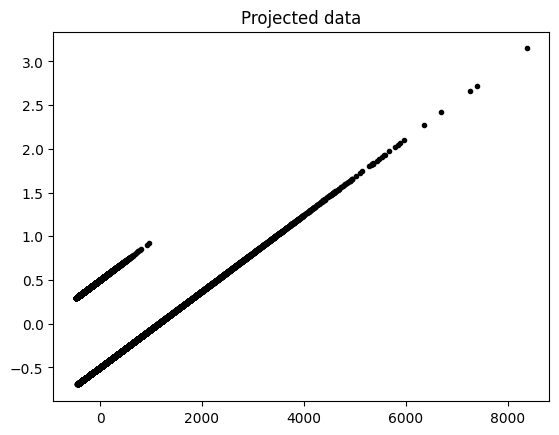

In [22]:
# Now apply PCA
from sklearn.decomposition import PCA

X = pivoted_df.drop(['Qualification', 'MSOA code', 'MSOA'], axis = 1)
y = pivoted_df['Qualification']

pca = PCA(n_components = 2)
pca.fit(X)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()